# The Machine Learning Process Project

## 1. Import the Needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import warnings

**1.1. Data Partition Imports**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.exceptions import ConvergenceWarning

**1.2. Filter Methods Imports**

In [3]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import randint

**1.3. Wrapper Methods Imports**

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE


**1.4. Embedded Methods Import's**

In [5]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, Ridge, ElasticNet

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score


In [7]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## 2. Import Data

In [8]:
data_train = pd.read_csv("train_data.csv")

C:\Users\tiago\AppData\Local\Temp\ipykernel_18988\3365673573.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv("train_data.csv")


In [9]:
data_test = pd.read_csv('test_data.csv')

## 3. Data Exploration and Preprocessing

### 3.1. Information About The Data

In [10]:
data_train_info = data_train.info()

data_train_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney_Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [11]:
data_train_head = data_train.head()
data_train_head

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [12]:
pd.set_option('display.max_columns', 31)
data_train_summary = data_train.describe(include='all')
data_train_summary

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,...,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
count,570337,574026.000000,574026,593471,574026,5.453750e+05,544948.000000,559466,187245,574026,574026,5.934710e+05,574026,574026,574026,...,132803.000000,564068.000000,564068,574026,0.0,558386.000000,558386,558369.000000,558369,556944.000000,556944,545389,574026.000000,574026,574026.000000
unique,5539,NaN,3,1096,2,NaN,NaN,2475,1648,2046,8,NaN,8,63,2,...,NaN,NaN,20,5,NaN,NaN,74,NaN,56,NaN,54,10060,NaN,1,NaN
top,2020-03-01,NaN,N,2020-03-06,N,NaN,NaN,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,NaN,2. NON-COMP,SUFFOLK,N,...,NaN,NaN,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,LIFTING,NaN,STRAIN OR TEAR,NaN,LOWER BACK AREA,11236,NaN,Not Work Related,NaN
freq,1245,NaN,571412,1422,392291,NaN,NaN,1847,350,111144,285368,NaN,291078,60430,546505,...,NaN,NaN,114339,265981,NaN,NaN,46610,NaN,153373,NaN,51862,3302,NaN,574026,NaN
mean,NaN,42.114270,NaN,NaN,NaN,4.910883e+02,1886.767604,NaN,NaN,NaN,NaN,2.366760e+07,NaN,NaN,NaN,...,3.207337,58.645305,NaN,NaN,NaN,54.381143,NaN,41.013839,NaN,39.738146,NaN,NaN,0.046665,NaN,3.006559
std,NaN,14.256432,NaN,NaN,NaN,6.092918e+03,414.644423,NaN,NaN,NaN,NaN,1.079271e+08,NaN,NaN,NaN,...,2.832303,19.644175,NaN,NaN,NaN,25.874281,NaN,22.207521,NaN,22.365940,NaN,NaN,0.210921,NaN,2.000801
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,5.393066e+06,NaN,NaN,NaN,...,1.000000,11.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,31.000000,NaN,NaN,NaN,0.000000e+00,1965.000000,NaN,NaN,NaN,NaN,5.593414e+06,NaN,NaN,NaN,...,1.000000,45.000000,NaN,NaN,NaN,31.000000,NaN,16.000000,NaN,33.000000,NaN,NaN,0.000000,NaN,1.000000
50%,NaN,42.000000,NaN,NaN,NaN,0.000000e+00,1977.000000,NaN,NaN,NaN,NaN,5.791212e+06,NaN,NaN,NaN,...,2.000000,61.000000,NaN,NaN,NaN,56.000000,NaN,49.000000,NaN,38.000000,NaN,NaN,0.000000,NaN,3.000000
75%,NaN,54.000000,NaN,NaN,NaN,8.410000e+02,1989.000000,NaN,NaN,NaN,NaN,5.991000e+06,NaN,NaN,NaN,...,4.000000,71.000000,NaN,NaN,NaN,75.000000,NaN,52.000000,NaN,53.000000,NaN,NaN,0.000000,NaN,5.000000


***

### 3.2. Processing The Data

**1. Remove Columns with Irrelevant Information or High Missing Values:**

In [13]:
cols_to_drop = ['OIICS Nature of Injury Description', 'Zip Code']

**2. Convert Date Columns to Datetime and Create new features from them**

In [14]:
date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

for col in date_cols:
    data_train[col] = pd.to_datetime(data_train[col], errors='coerce')
    data_test[col] = pd.to_datetime(data_test[col], errors='coerce')

data_train['days_to_assembly'] = (data_train['Assembly Date'] - data_train['Accident Date']).dt.days
data_test['days_to_assembly'] = (data_test['Assembly Date'] - data_test['Accident Date']).dt.days

data_train['days_to_c2'] = (data_train['C-2 Date'] - data_train['Accident Date']).dt.days
data_test['days_to_c2'] = (data_test['C-2 Date'] - data_test['Accident Date']).dt.days

data_train['days_to_c3'] = (data_train['C-3 Date'] - data_train['Accident Date']).dt.days
data_test['days_to_c3'] = (data_test['C-3 Date'] - data_test['Accident Date']).dt.days

data_train['days_to_first_hearing'] = (data_train['First Hearing Date'] - data_train['Accident Date']).dt.days
data_test['days_to_first_hearing'] = (data_test['First Hearing Date'] - data_test['Accident Date']).dt.days


**3. Handle Missing Values**

**Categorical Values:**

In [15]:
for col in data_train.select_dtypes(include=['object']).columns:
    data_train[col] = data_train[col].fillna(data_train[col].mode()[0])

for col in data_test.select_dtypes(include=['object']).columns:
    data_test[col] = data_test[col].fillna(data_test[col].mode()[0])

**Numerical Values:**

In [16]:
for col in data_train.select_dtypes(include=['int64', 'float64']).columns:
    data_train[col] = data_train[col].fillna(data_train[col].median())

for col in data_test.select_dtypes(include=['int64', 'float64']).columns:
    data_test[col] = data_test[col].fillna(data_test[col].median())


c:\Users\tiago\OneDrive\Ambiente de Trabalho\ML\ml_env\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\tiago\OneDrive\Ambiente de Trabalho\ML\ml_env\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [17]:
data_train_label_encoding = data_train
data_test_label_encoding = data_test


**4. Exploring The Data before the encoding**

**4.1. Verificar se a variável alvo está balanceada**

C:\Users\tiago\AppData\Local\Temp\ipykernel_18988\4026516013.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Claim Injury Type', data=data_train, palette='magma')


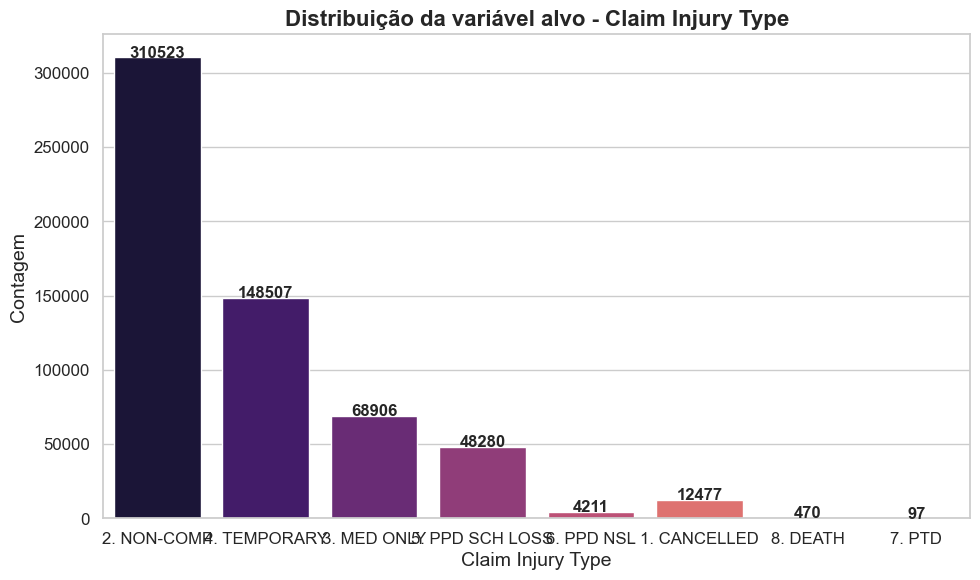

In [18]:
sns.set(style='whitegrid', palette='viridis', font_scale=1.1)

plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Claim Injury Type', data=data_train, palette='magma')

plt.title('Distribuição da variável alvo - Claim Injury Type', fontsize=16, weight='bold')
plt.xlabel('Claim Injury Type', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{int(height)}', ha="center", fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

**4.2. Frequência de variáveis categóricas selecionadas(Sem codifição dessas para inteiro)**

C:\Users\tiago\AppData\Local\Temp\ipykernel_18988\1540282969.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=data_train, palette=palette)
C:\Users\tiago\AppData\Local\Temp\ipykernel_18988\1540282969.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)


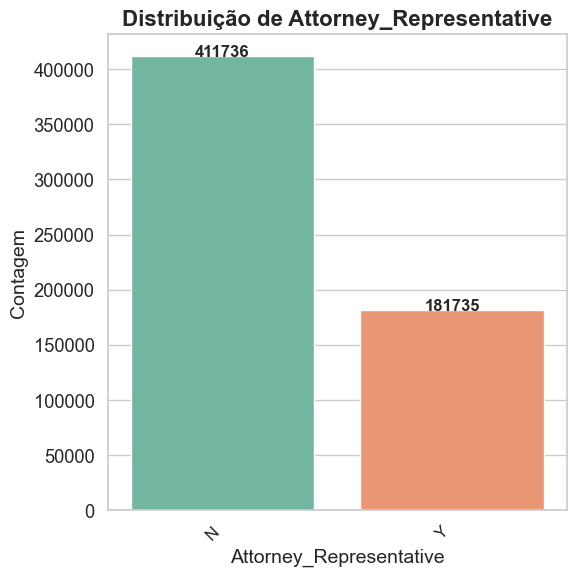

C:\Users\tiago\AppData\Local\Temp\ipykernel_18988\1540282969.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=data_train, palette=palette)
C:\Users\tiago\AppData\Local\Temp\ipykernel_18988\1540282969.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)


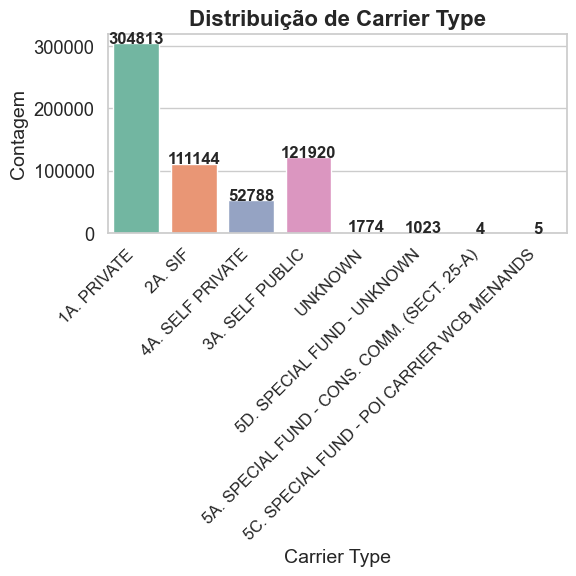

C:\Users\tiago\AppData\Local\Temp\ipykernel_18988\1540282969.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=data_train, palette=palette)
C:\Users\tiago\AppData\Local\Temp\ipykernel_18988\1540282969.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)


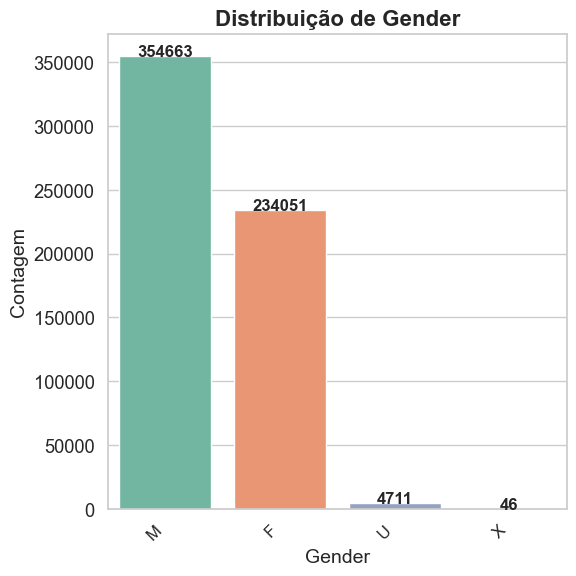

C:\Users\tiago\AppData\Local\Temp\ipykernel_18988\1540282969.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=data_train, palette=palette)
C:\Users\tiago\AppData\Local\Temp\ipykernel_18988\1540282969.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)


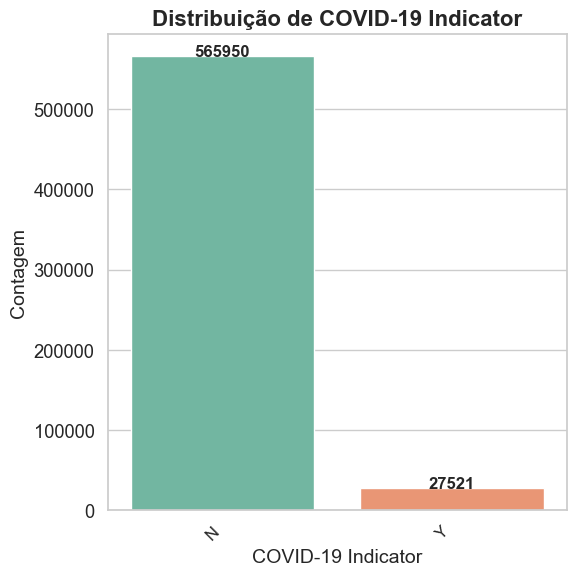

In [19]:
categorical_cols = ['Attorney_Representative', 'Carrier Type', 'Gender', 'COVID-19 Indicator']
sns.set(style='whitegrid', font_scale=1.2)
palette = 'Set2'

for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    ax = sns.countplot(x=col, data=data_train, palette=palette)

    plt.title(f'Distribuição de {col}', fontsize=16, weight='bold')
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Contagem', fontsize=14)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 2, f'{int(height)}', ha="center", fontsize=12, weight='bold')

    plt.tight_layout()
    plt.show()


**4.3. Correlação entre Features(Antes de ter transformado/ codificado as variáveis categóricas)**

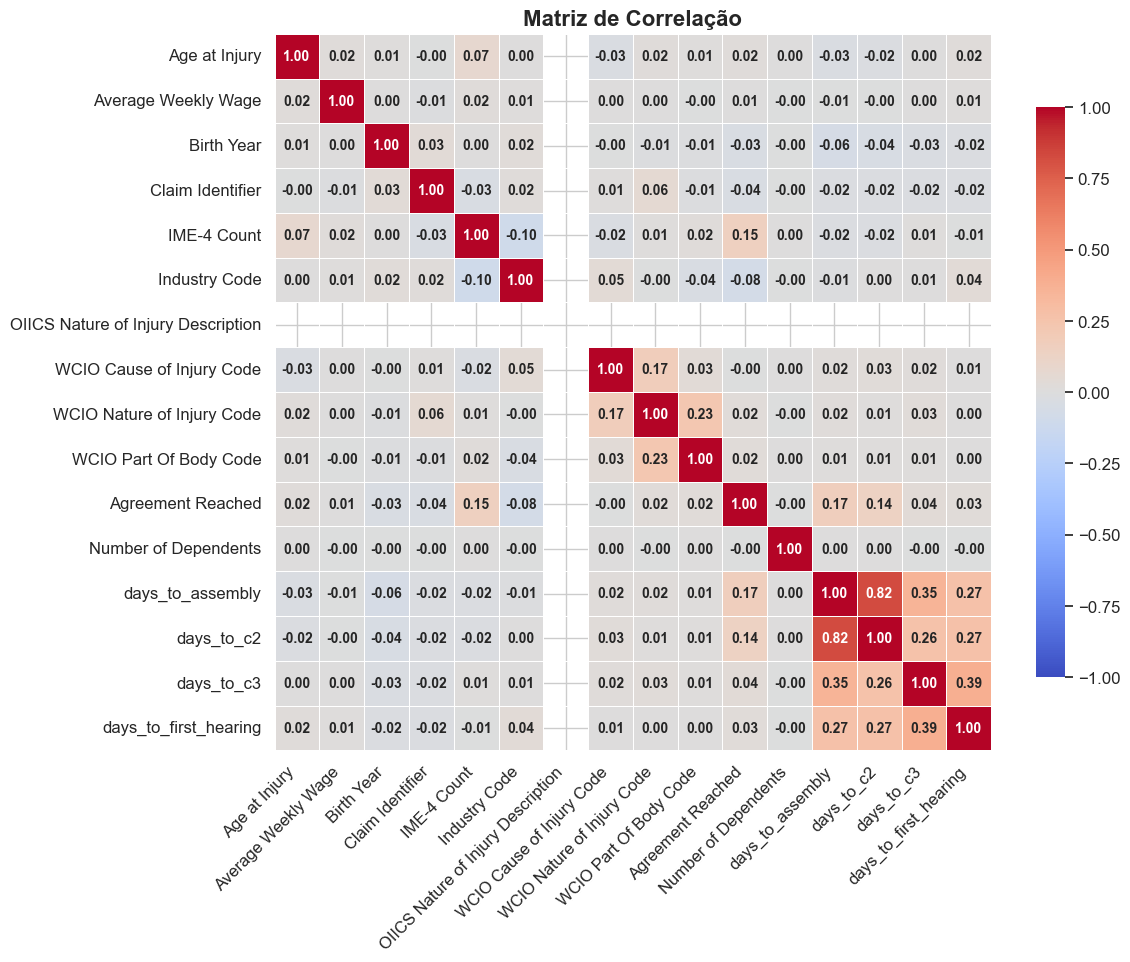

In [20]:
corr_matrix = data_train.select_dtypes(include=['float64', 'int64']).corr()

sns.set(style='whitegrid', font_scale=1.1)

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.5,
            square=True,
            cbar_kws={'shrink': 0.75},
            annot_kws={'size': 10, 'weight': 'bold'})

plt.title('Matriz de Correlação', fontsize=16, weight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


**5. Encoding Categorical Variable:**

In [21]:
categorical_cols = data_train.select_dtypes(include=['object']).columns
encoded_categorical_variables = {}
cols_categorical_variables_to_drop = []
categorical_cols

Index(['Alternative Dispute Resolution', 'Attorney_Representative',
       'Carrier Name', 'Carrier Type', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Description', 'Zip Code', 'WCB Decision'],
      dtype='object')

**5.1. Alternative Dispute Resolution**

In [22]:
unique_values_ADR = sorted(data_train['Alternative Dispute Resolution'].unique())

mapping_ADR = {val : x for x, val in enumerate(unique_values_ADR, start=0)}
encoded_categorical_variables['Alternative Dispute Resolution'] = mapping_ADR

data_train_label_encoding['Alternative Dispute Resolution' + '_encoded'] = data_train_label_encoding['Alternative Dispute Resolution'].map(mapping_ADR)
cols_categorical_variables_to_drop.append('Alternative Dispute Resolution')

**5.2. Attorney/Representative**

In [23]:
unique_values_AR = sorted(data_train['Attorney_Representative'].unique())

mapping_AR = {val : x for x, val in enumerate(unique_values_AR, start=0)}
encoded_categorical_variables['Attorney_Representative'] = mapping_AR

data_train_label_encoding['Attorney_Representative' + '_encoded'] = data_train_label_encoding['Attorney_Representative'].map(mapping_AR)
cols_categorical_variables_to_drop.append('Attorney_Representative')

**5.3. Carrier Name**

In [24]:
unique_values_CN = sorted(data_train['Carrier Name'].unique())

mapping_CN = {val : x for x, val in enumerate(unique_values_CN, start=0)}
encoded_categorical_variables['Carrier Name'] = mapping_CN

data_train_label_encoding['Carrier Name' + '_encoded'] = data_train_label_encoding['Carrier Name'].map(mapping_CN)
cols_categorical_variables_to_drop.append('Carrier Name')

**5.4. Carrier Type**

In [25]:
unique_values_CT = sorted(data_train['Carrier Type'].unique())

mapping_CT = {val : x for x, val in enumerate(unique_values_CT, start=0)}
encoded_categorical_variables['Carrier Type'] = mapping_CT

data_train_label_encoding['Carrier Type' + '_encoded'] = data_train_label_encoding['Carrier Type'].map(mapping_CT)
cols_categorical_variables_to_drop.append('Carrier Type')

**5.5. Claim Injury Type**

In [26]:
unique_values_CIT = sorted(data_train['Claim Injury Type'].unique())

mapping_CIT = {val : x for x, val in enumerate(unique_values_CIT, start=0)}
encoded_categorical_variables['Claim Injury Type'] = mapping_CIT

data_train_label_encoding['Claim Injury Type' + '_encoded'] = data_train_label_encoding['Claim Injury Type'].map(mapping_CIT)
cols_categorical_variables_to_drop.append('Claim Injury Type')

**5.6. County of Injury**

In [27]:
unique_values_CI = sorted(data_train['County of Injury'].unique())

mapping_CI = {val : x for x, val in enumerate(unique_values_CI, start=0)}
encoded_categorical_variables['County of Injury'] = mapping_CI

data_train_label_encoding['County of Injury' + '_encoded'] = data_train_label_encoding['County of Injury'].map(mapping_CI)
cols_categorical_variables_to_drop.append('County of Injury')

**5.7. COVID-19 Indicator**

In [28]:
unique_values_C19I = sorted(data_train['COVID-19 Indicator'].unique())

mapping_C19I = {val : x for x, val in enumerate(unique_values_C19I, start=0)}
encoded_categorical_variables['COVID-19 Indicator'] = mapping_C19I

data_train_label_encoding['COVID-19 Indicator' + '_encoded'] = data_train_label_encoding['COVID-19 Indicator'].map(mapping_C19I)
cols_categorical_variables_to_drop.append('COVID-19 Indicator')

**5.7. District Name**

In [29]:
unique_values_DN = sorted(data_train['District Name'].unique())

mapping_DN = {val : x for x, val in enumerate(unique_values_DN, start=0)}
encoded_categorical_variables['District Name'] = mapping_DN

data_train_label_encoding['District Name' + '_encoded'] = data_train_label_encoding['District Name'].map(mapping_DN)
cols_categorical_variables_to_drop.append('District Name')

**5.8. Gender**

In [30]:
data_train['Gender'] = data_train['Gender'].replace('X', 'U')

unique_values_G = sorted(data_train['Gender'].unique())

mapping_G = {val : x for x, val in enumerate(unique_values_G, start=0)}
encoded_categorical_variables['Gender'] = mapping_G

data_train_label_encoding['Gender' + '_encoded'] = data_train_label_encoding['Gender'].map(mapping_G)
cols_categorical_variables_to_drop.append('Gender')

**5.9. Industry Code Description**

- Não será necessário codificá-la, devido a ser uma descrição de code que já foi identificado.

In [31]:
cols_categorical_variables_to_drop.append('Industry Code Description')

**5.10. Medical Fee Region**

In [32]:
unique_values_MDF = sorted(data_train['Medical Fee Region'].unique())

mapping_MDF = {val : x for x , val in enumerate(unique_values_MDF, start=0)}
encoded_categorical_variables['Medical Fee Region'] = mapping_MDF

data_train_label_encoding['Medical Fee Region' + '_encoded'] = data_train_label_encoding['Medical Fee Region'].map(mapping_MDF)
cols_categorical_variables_to_drop.append('Medical Fee Region')

**5.11. WCIO Cause of Injury Description**

- Não será necessário codificá-la, devido a ser uma descrição de code que já foi identificado

In [33]:
cols_categorical_variables_to_drop.append('WCIO Cause of Injury Description')

**5.12. WCIO Nature of Injury Description**

- Não será necessário codificá-la, devido a ser uma descrição de code que já foi identificado.

In [34]:
cols_categorical_variables_to_drop.append('WCIO Nature of Injury Description')

**5.13. WCIO Part Of Body Description**

- Não será necessário codificá-la, devido a ser uma descrição de code que já foi identificado.

In [35]:
cols_categorical_variables_to_drop.append('WCIO Part Of Body Description')

**5.14. WCB Decision**

In [36]:
unique_values_WCBD = sorted(data_train['WCB Decision'].unique())

mapping_WCBD = {val : x for x, val in enumerate(unique_values_WCBD, start=0)}
encoded_categorical_variables['WCB Decision'] = mapping_WCBD

data_train_label_encoding['WCB Decision' + '_encoded'] = data_train_label_encoding['WCB Decision'].map(mapping_WCBD)
cols_categorical_variables_to_drop.append('WCB Decision')

**6. Eliminar Colunas**

- Colunas que não são necessárias para o projeto

In [37]:
data_train_label_encoding = data_train_label_encoding.drop(columns=cols_to_drop)
data_train_label_encoding = data_train_label_encoding.drop(columns=date_cols)
data_train_label_encoding = data_train_label_encoding.drop(columns=cols_categorical_variables_to_drop)

In [38]:
data_test_label_encoding = data_test_label_encoding.drop(columns=cols_to_drop)
data_test_label_encoding = data_test_label_encoding.drop(columns=date_cols)

**7. Export Encoded Settings for the Categorical Variables of the data**

In [39]:
with pd.ExcelWriter('Codification_for_categorical_variables.xlsx') as writer:

    for col, mapping in encoded_categorical_variables.items():
        if isinstance(mapping, dict):
            mapping_df = pd.DataFrame(mapping.items(), columns=[col, f'{col}_encoded'])

            sheet_name = re.sub(r'[\/:*?"<>|]', '_', f'Codificacao_{col}')

            mapping_df.to_excel(writer, sheet_name=sheet_name, index=False)

c:\Users\tiago\OneDrive\Ambiente de Trabalho\ML\ml_env\Lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


***

### 3.3. Verify the info of the data and see the correlation

In [40]:
data_train_label_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 26 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Age at Injury                           593471 non-null  float64
 1   Average Weekly Wage                     593471 non-null  float64
 2   Birth Year                              593471 non-null  float64
 3   Claim Identifier                        593471 non-null  int64  
 4   IME-4 Count                             593471 non-null  float64
 5   Industry Code                           593471 non-null  float64
 6   WCIO Cause of Injury Code               593471 non-null  float64
 7   WCIO Nature of Injury Code              593471 non-null  float64
 8   WCIO Part Of Body Code                  593471 non-null  float64
 9   Agreement Reached                       593471 non-null  float64
 10  Number of Dependents                    5934

In [41]:
data_train_label_encoding.head()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents,days_to_assembly,days_to_c2,days_to_c3,days_to_first_hearing,Alternative Dispute Resolution_encoded,Attorney_Representative_encoded,Carrier Name_encoded,Carrier Type_encoded,Claim Injury Type_encoded,County of Injury_encoded,COVID-19 Indicator_encoded,District Name_encoded,Gender_encoded,Medical Fee Region_encoded,WCB Decision_encoded
0,31.0,0.00,1988.0,5393875,2.0,44.0,27.0,10.0,62.0,0.0,1.0,2.0,1.0,27.0,237.0,0,0,1197,0,1,49,0,7,1,0,0
1,46.0,1745.93,1973.0,5393091,4.0,23.0,97.0,49.0,38.0,1.0,4.0,124.0,124.0,137.0,175.0,0,1,2044,0,3,61,0,5,0,0,0
2,40.0,1434.80,1979.0,5393889,2.0,56.0,79.0,7.0,10.0,0.0,6.0,26.0,26.0,27.0,237.0,0,0,894,0,3,35,0,0,1,1,0
3,42.0,0.00,1977.0,957648180,2.0,61.0,56.0,49.0,38.0,0.0,3.0,10.0,10.0,27.0,237.0,0,0,1710,0,1,51,0,4,1,3,0
4,61.0,0.00,1958.0,5393887,2.0,62.0,16.0,43.0,36.0,0.0,1.0,2.0,1.0,27.0,237.0,0,0,1710,1,1,13,0,0,1,1,0


**3.3.1. Nova Correlação( Depois de ter transformado/codificado as variáveis categóricas)**

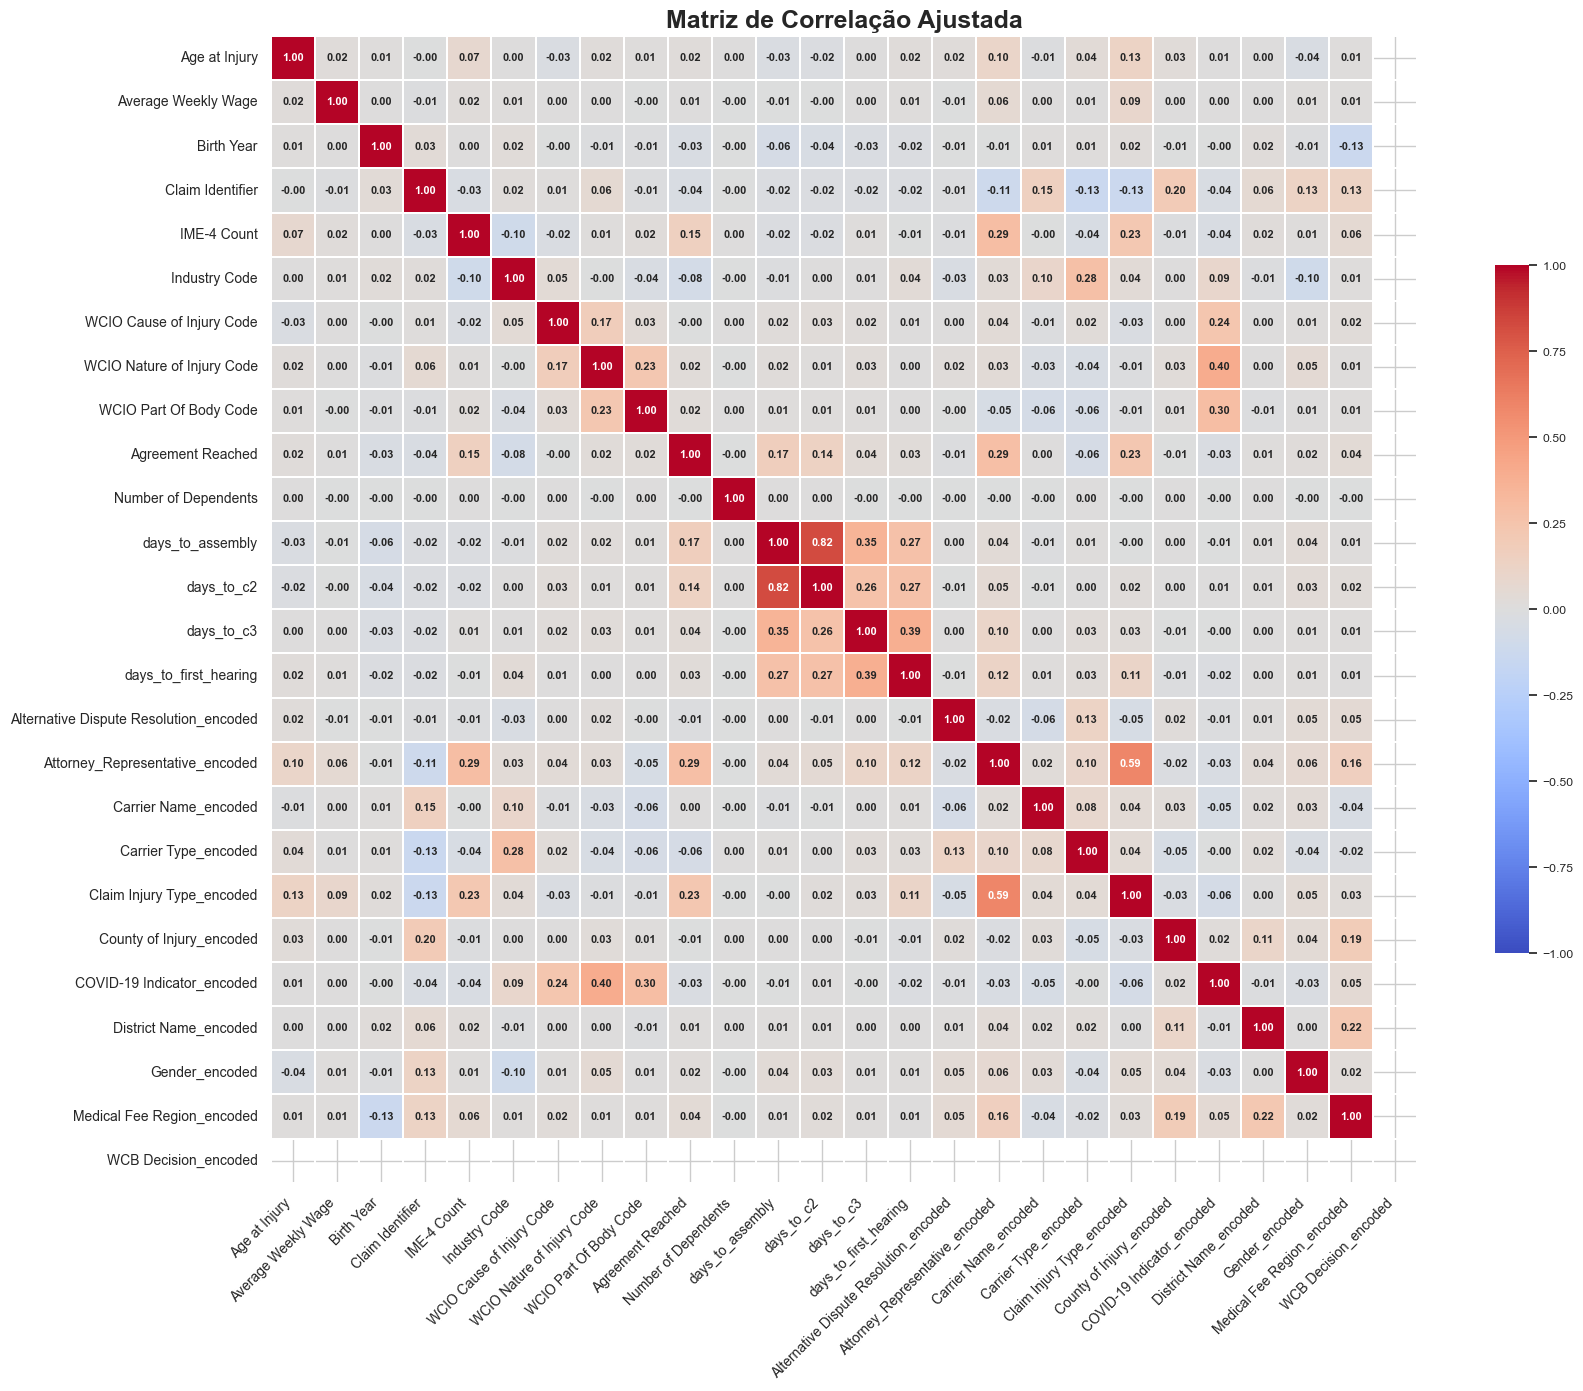

In [42]:
corr_matrix = data_train_label_encoding.select_dtypes(include=['float64', 'int64']).corr()

sns.set(style='whitegrid', font_scale=0.8)

plt.figure(figsize=(18, 14))

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.3,
            square=True,
            cbar_kws={'shrink': 0.6},
            annot_kws={'size': 8, 'weight': 'bold'})

plt.title('Matriz de Correlação Ajustada', fontsize=18, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


***

### 3.4. Data Partition and Scalling

- Define the independent variables __X__ and the dependent variable ('Claim Injury Type') as __y__

In [43]:
X = data_train_label_encoding.drop('Claim Injury Type_encoded', axis = 1)
y = data_train_label_encoding['Claim Injury Type_encoded']

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.34, random_state = 42, stratify = y, shuffle = True)

- Verify if exists missing in the variables with the method `info()`

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391690 entries, 429165 to 583341
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Age at Injury                           391690 non-null  float64
 1   Average Weekly Wage                     391690 non-null  float64
 2   Birth Year                              391690 non-null  float64
 3   Claim Identifier                        391690 non-null  int64  
 4   IME-4 Count                             391690 non-null  float64
 5   Industry Code                           391690 non-null  float64
 6   WCIO Cause of Injury Code               391690 non-null  float64
 7   WCIO Nature of Injury Code              391690 non-null  float64
 8   WCIO Part Of Body Code                  391690 non-null  float64
 9   Agreement Reached                       391690 non-null  float64
 10  Number of Dependents                    3916

- Normalize the numerical data using MinMaxScaler. This function applies the following formula:

$$X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}},$$

where:
- $X$ is the original feature vector,
- $X_{\\{min}}$ is the smallest value in that feature column, and
- $X_{\\{max}}$ is the largest value in that feature column.


In [46]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_train_scaled

array([[0.26495726, 0.        , 0.97968285, ..., 0.        , 0.        ,
        0.        ],
       [0.41025641, 0.        , 0.97770069, ..., 0.5       , 0.75      ,
        0.        ],
       [0.35042735, 0.        , 0.98116947, ..., 0.5       , 1.        ,
        0.        ],
       ...,
       [0.33333333, 0.        , 0.98216056, ..., 0.        , 0.5       ,
        0.        ],
       [0.21367521, 0.        , 0.98909812, ..., 0.5       , 0.        ,
        0.        ],
       [0.18803419, 0.        , 0.99108028, ..., 0.        , 0.75      ,
        0.        ]])

- Convert the array into a pandas dataframe

In [47]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns).set_index(X_train.index)
X_train_scaled.head(3)

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents,days_to_assembly,days_to_c2,days_to_c3,days_to_first_hearing,Alternative Dispute Resolution_encoded,Attorney_Representative_encoded,Carrier Name_encoded,Carrier Type_encoded,County of Injury_encoded,COVID-19 Indicator_encoded,District Name_encoded,Gender_encoded,Medical Fee Region_encoded,WCB Decision_encoded
429165,0.264957,0.0,0.979683,0.000560,0.013889,0.629630,0.163265,0.466667,0.416667,0.0,0.833333,0.050607,0.292494,0.154898,0.044498,0.0,0.0,0.827873,0.000000,0.709677,0.0,0.000000,0.0,0.00,0.0
426549,0.410256,0.0,0.977701,0.000557,0.013889,0.456790,0.908163,0.644444,0.000000,0.0,1.000000,0.050075,0.292097,0.154898,0.044498,0.0,0.0,0.631296,0.285714,0.483871,0.0,0.571429,0.5,0.75,0.0
345103,0.350427,0.0,0.981169,0.000449,0.013889,0.506173,1.000000,0.644444,0.916667,0.0,0.833333,0.056634,0.296985,0.154898,0.044498,0.0,0.0,0.032763,0.000000,0.564516,0.0,0.000000,0.5,1.00,0.0


- Now we gonna using the scaller , to scale the numerical validation data also between 0 and 1

In [48]:
X_val_scaled = scaler.transform(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns).set_index(X_val.index)

X_val_scaled.head(3)

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents,days_to_assembly,days_to_c2,days_to_c3,days_to_first_hearing,Alternative Dispute Resolution_encoded,Attorney_Representative_encoded,Carrier Name_encoded,Carrier Type_encoded,County of Injury_encoded,COVID-19 Indicator_encoded,District Name_encoded,Gender_encoded,Medical Fee Region_encoded,WCB Decision_encoded
263640,0.401709,0.000000,0.978196,0.000343,0.013889,0.629630,0.561224,0.566667,0.555556,0.0,0.666667,0.050563,0.292461,0.154898,0.044498,0.0,0.0,0.686064,0.000000,0.645161,0.0,0.571429,0.0,0.75,0.0
71208,0.000000,0.000000,0.000000,0.000094,0.013889,0.617284,0.561224,0.533333,0.435185,0.0,0.833333,0.051981,0.292329,0.155035,0.044498,0.0,1.0,0.697800,0.285714,0.645161,1.0,0.571429,0.5,0.75,0.0
331645,0.239316,0.000189,0.987611,0.000432,0.013889,0.629630,0.602041,0.566667,0.435185,0.0,0.333333,0.050120,0.292130,0.155217,0.044498,0.0,0.0,0.742787,0.428571,0.435484,0.0,0.714286,0.0,0.25,0.0


***

## 4. Feature Selection

### 4.1. Filter Methods

**4.1.1 Univariate variables**

- Check if any variable is univariate( variance = 0 )

In [49]:
X_train_scaled.var()

Age at Injury                             0.014345
Average Weekly Wage                       0.000006
Birth Year                                0.039329
Claim Identifier                          0.011886
IME-4 Count                               0.000397
Industry Code                             0.055972
WCIO Cause of Injury Code                 0.065595
WCIO Nature of Injury Code                0.057728
WCIO Part Of Body Code                    0.040288
Agreement Reached                         0.042977
Number of Dependents                      0.107701
days_to_assembly                          0.000690
days_to_c2                                0.000266
days_to_c3                                0.000107
days_to_first_hearing                     0.000196
Alternative Dispute Resolution_encoded    0.004344
Attorney_Representative_encoded           0.212421
Carrier Name_encoded                      0.090430
Carrier Type_encoded                      0.024853
County of Injury_encoded       

- In that case the univariate is WCB Decision_encoded, so we can drop it in the train and in the validation dataset

In [50]:
X_train_scaled.drop('WCB Decision_encoded', axis = 1, inplace = True)
X_val_scaled.drop('WCB Decision_encoded', axis = 1, inplace = True)
X_train_scaled.head(3)

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents,days_to_assembly,days_to_c2,days_to_c3,days_to_first_hearing,Alternative Dispute Resolution_encoded,Attorney_Representative_encoded,Carrier Name_encoded,Carrier Type_encoded,County of Injury_encoded,COVID-19 Indicator_encoded,District Name_encoded,Gender_encoded,Medical Fee Region_encoded
429165,0.264957,0.0,0.979683,0.000560,0.013889,0.629630,0.163265,0.466667,0.416667,0.0,0.833333,0.050607,0.292494,0.154898,0.044498,0.0,0.0,0.827873,0.000000,0.709677,0.0,0.000000,0.0,0.00
426549,0.410256,0.0,0.977701,0.000557,0.013889,0.456790,0.908163,0.644444,0.000000,0.0,1.000000,0.050075,0.292097,0.154898,0.044498,0.0,0.0,0.631296,0.285714,0.483871,0.0,0.571429,0.5,0.75
345103,0.350427,0.0,0.981169,0.000449,0.013889,0.506173,1.000000,0.644444,0.916667,0.0,0.833333,0.056634,0.296985,0.154898,0.044498,0.0,0.0,0.032763,0.000000,0.564516,0.0,0.000000,0.5,1.00


**4.1.2 Correlation Indices**

- In here we are going to check the spearman correlation between variables.

- Now we see the correlation with the __X_train_scaled__

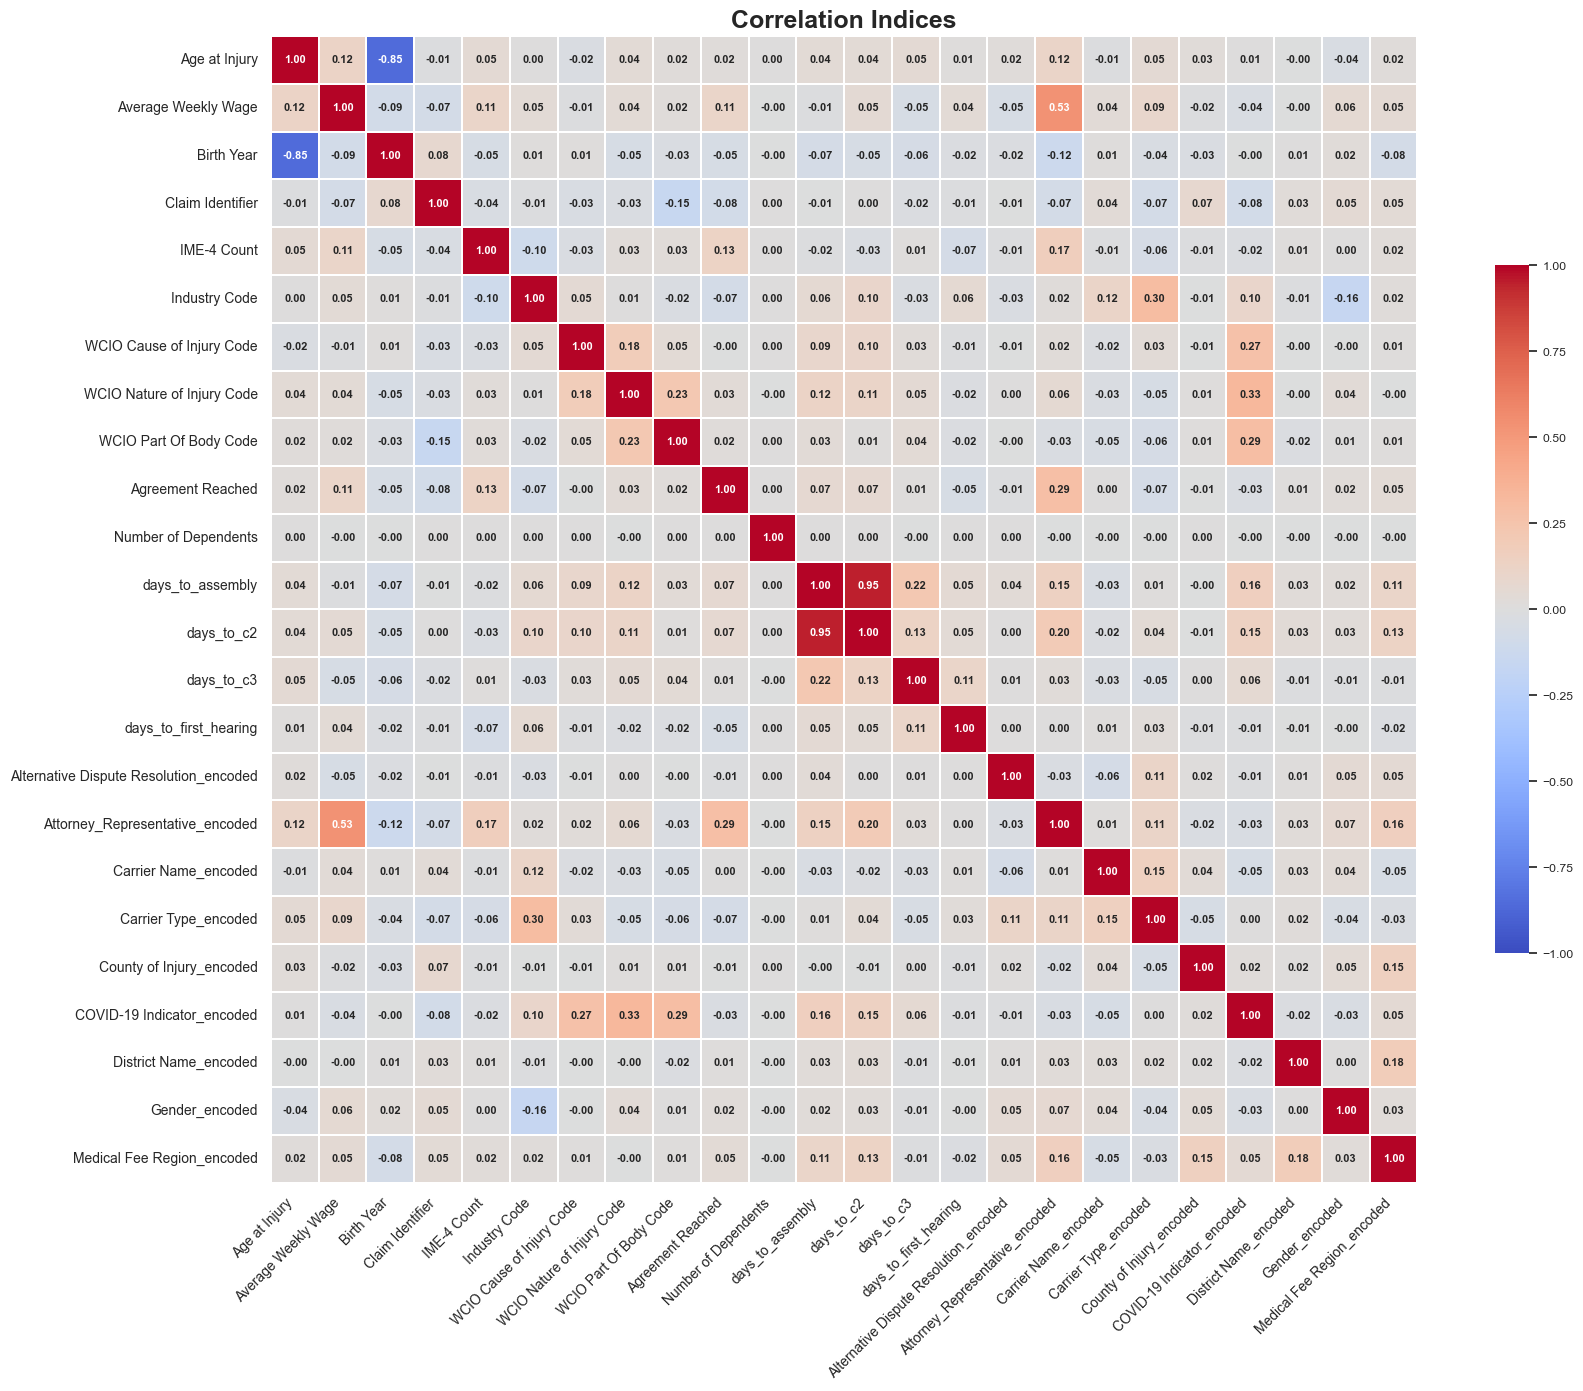

In [51]:
cor_spearman = X_train_scaled.corr(method = 'spearman')

sns.set(style='whitegrid', font_scale=0.8)

plt.figure(figsize=(18, 14))

sns.heatmap(cor_spearman,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.3,
            square=True,
            cbar_kws={'shrink': 0.6},
            annot_kws={'size': 8, 'weight': 'bold'})

plt.title('Correlation Indices', fontsize=18, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

**4.1.3 Chi-Square**

- Now we are going to check the importance of the numerical independent variables in the target.

- Here we create a function named as `TestIndependence`:

In [52]:
def TestIndependence(X_df, y, bins=4, alpha=0.05):
    discard_features = []

    for var in X_df.columns:
        X = X_df[var]

        if np.issubdtype(X.dtype, np.number):
            X_binned = pd.qcut(X, bins, duplicates='drop')
        else:
            X_binned = X

        dfObserved = pd.crosstab(y, X_binned)
        chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)

        if p >= alpha:
            discard_features.append(var)

    return discard_features

- Now for all numerical variables available on __X_train_scaled__, call the function TestIndependence.

In [53]:
discard_features_chi_square = TestIndependence(X_train_scaled, y_train, bins=4, alpha=0.05)
print("Features to discard based on independence test:", discard_features_chi_square)

Features to discard based on independence test: ['Agreement Reached', 'Alternative Dispute Resolution_encoded', 'Attorney_Representative_encoded', 'COVID-19 Indicator_encoded']


**4.1.4. Visualize te weight of the Dependent Variable in Numerical Data**

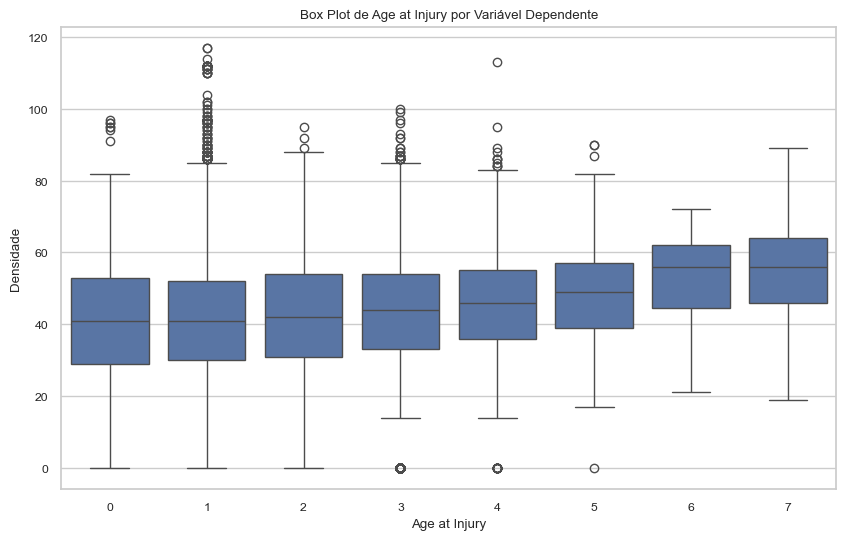

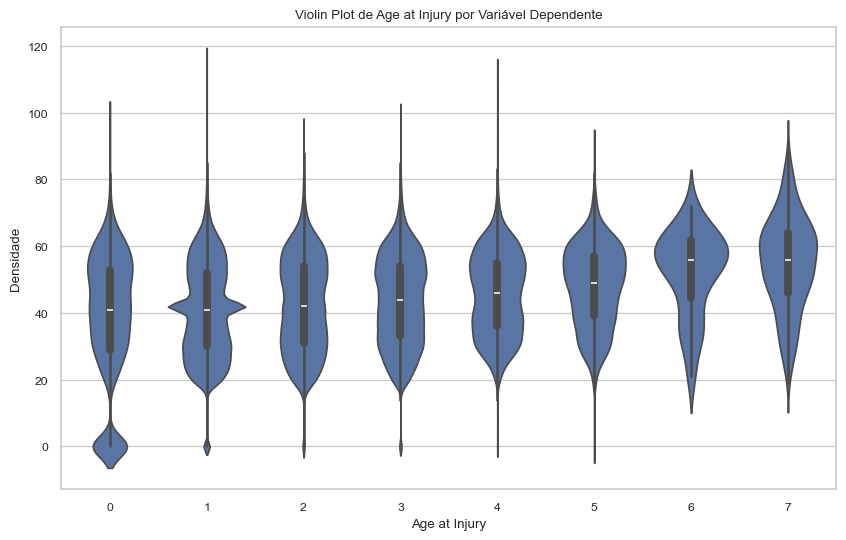

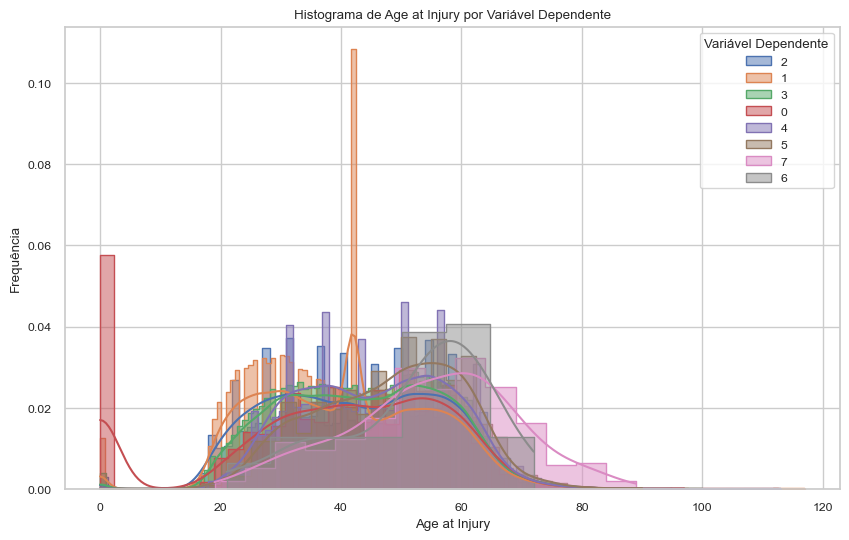

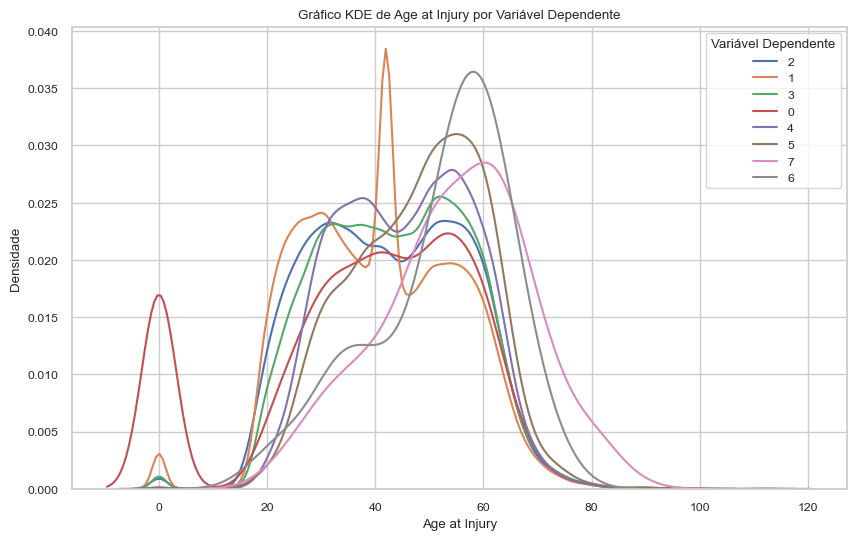

In [54]:
def plot_feature_importance(X, y, feature, plot_type='box'):
    plt.figure(figsize=(10, 6))

    if plot_type == 'box':
        sns.boxplot(x=y, y=X[feature])
        plt.title(f'Box Plot de {feature} por Variável Dependente')

    elif plot_type == 'violin':
        sns.violinplot(x=y, y=X[feature])
        plt.title(f'Violin Plot de {feature} por Variável Dependente')

    elif plot_type == 'hist':
        for category in y.unique():
            sns.histplot(X[feature][y == category], kde=True, label=str(category), element='step', stat='density')
        plt.legend(title='Variável Dependente')
        plt.title(f'Histograma de {feature} por Variável Dependente')

    elif plot_type == 'kde':
        for category in y.unique():
            sns.kdeplot(X[feature][y == category], label=str(category))
        plt.legend(title='Variável Dependente')
        plt.title(f'Gráfico KDE de {feature} por Variável Dependente')

    plt.xlabel(feature)
    plt.ylabel('Frequência' if plot_type == 'hist' else 'Densidade')
    plt.show()

plot_feature_importance(X_train, y_train, feature='Age at Injury', plot_type='box')
plot_feature_importance(X_train, y_train, feature='Age at Injury', plot_type='violin')
plot_feature_importance(X_train, y_train, feature='Age at Injury', plot_type='hist')
plot_feature_importance(X_train, y_train, feature='Age at Injury', plot_type='kde')


### 4.2. Wrapper Methods

In [55]:
def score_check_using_diferent_number_of_features(model, X_train_scaled, y_train, X_val_scaled, y_val, patience=8, nof_list=np.arange(1, 31), nof=None):
    high_score = 0
    train_score_list = []
    val_score_list = []
    features_to_select = None

    if nof is not None:
        rfe = RFE(estimator=model, n_features_to_select=nof)
        X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
        X_val_rfe = rfe.transform(X_val_scaled)

        model.fit(X_train_rfe, y_train)

        train_score = model.score(X_train_rfe, y_train)
        val_score = model.score(X_val_rfe, y_val)

        features_to_select = X_train_scaled.columns[rfe.support_]

        return nof, val_score, [train_score], [val_score], features_to_select

    no_improvement_count = 0
    for n in nof_list:
        rfe = RFE(estimator=model, n_features_to_select=n)
        X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
        X_val_rfe = rfe.transform(X_val_scaled)

        model.fit(X_train_rfe, y_train)

        train_score = model.score(X_train_rfe, y_train)
        train_score_list.append(train_score)

        val_score = model.score(X_val_rfe, y_val)
        val_score_list.append(val_score)

        if val_score > high_score:
            high_score = val_score
            nof = n
            features_to_select = X_train_scaled.columns[rfe.support_]
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if no_improvement_count >= patience:
            print("Parando antecipadamente devido à ausência de melhorias.")
            break

    return nof, high_score, train_score_list, val_score_list, features_to_select

In [56]:
def plot_optimal_features(train_score_list, val_score_list, nof, nof_list=np.arange(1,31)):
    plt.figure(figsize=(10, 6))
    plt.plot(nof_list[:len(train_score_list)], train_score_list, label="Score no Conjunto de Treinamento", color='yellowgreen', marker='o')
    plt.plot(nof_list[:len(val_score_list)], val_score_list, label="Score no Conjunto de Validação", color='dimgray', marker='s')
    plt.axvline(nof, color='blue', linestyle='--', label=f'Melhor Nº de Características: {nof}')
    plt.xlabel("Número de Características Selecionadas")
    plt.ylabel("Score")
    plt.title("Score do Modelo vs. Número de Características Selecionadas")
    plt.legend()
    plt.grid(True)
    plt.show()

**4.2.1. RFE(Logistic Regression)**

If we doesn't know apriori the number of features to select you can create a loop to check the score of the estimator using a different number of features. <br>
Below you have an example that will check the score of the estimator by chosing between 1 and 31 variables.

In [57]:
modelLogisticRegression = LogisticRegression()
nof_LR, high_score_LR, train_score_list_LR, val_score_list_LR, features_to_select_LR = score_check_using_diferent_number_of_features(model=modelLogisticRegression,
    X_train_scaled=X_train_scaled,
    y_train=y_train,
    X_val_scaled=X_val_scaled,
    y_val=y_val,
    nof=24)
print("O Número de Carateristicas Melhor é de : " + str(nof_LR))
print("O score marcado foi de : " + str(high_score_LR))
print(f"As features selecionadas foram : {features_to_select_LR}")

O Número de Carateristicas Melhor é de : 24
O score marcado foi de : 0.6523309925116835
As features selecionadas foram : Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year',
       'Claim Identifier', 'IME-4 Count', 'Industry Code',
       'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
       'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents',
       'days_to_assembly', 'days_to_c2', 'days_to_c3', 'days_to_first_hearing',
       'Alternative Dispute Resolution_encoded',
       'Attorney_Representative_encoded', 'Carrier Name_encoded',
       'Carrier Type_encoded', 'County of Injury_encoded',
       'COVID-19 Indicator_encoded', 'District Name_encoded', 'Gender_encoded',
       'Medical Fee Region_encoded'],
      dtype='object')


**4.2.2. Árvores de Decisão**

**4.2.2.1 Decision Tree Classifier**

In [58]:
decisionTreeModelClassifier = DecisionTreeClassifier()
nof_TC, high_score_TC, train_score_list_TC, val_score_list_TC, features_to_select_TC = score_check_using_diferent_number_of_features(model=decisionTreeModelClassifier,
    X_train_scaled=X_train_scaled,
    y_train=y_train,
    X_val_scaled=X_val_scaled,
    y_val=y_val,
    nof=1)
print("O Número de Carateristicas Melhor é de : " + str(nof_TC))
print("O score marcado foi de : " + str(high_score_TC))
print(f"As features selecionadas foram : {features_to_select_TC}")
#plot_optimal_features(train_score_list_TC, val_score_list_TC, nof_TC)

O Número de Carateristicas Melhor é de : 1
O score marcado foi de : 0.7439550800124888
As features selecionadas foram : Index(['Average Weekly Wage'], dtype='object')


**4.2.2.2 Decision Tree Regressor**

In [59]:
decisionTreeModelRegressor = DecisionTreeRegressor()
nof_TR, high_score_TR, train_score_list_TR, val_score_list_TR, features_to_select_TR = score_check_using_diferent_number_of_features(model=decisionTreeModelRegressor,
    X_train_scaled=X_train_scaled,
    y_train=y_train,
    X_val_scaled=X_val_scaled,
    y_val=y_val,
    nof=1)
print("O Número de Carateristicas Melhor é de : " + str(nof_TR))
print("O score marcado foi de : " + str(high_score_TR))
print(f"As features selecionadas foram : {features_to_select_TR}")
#plot_optimal_features(train_score_list_TR, val_score_list_TR, nof_TR)

O Número de Carateristicas Melhor é de : 1
O score marcado foi de : 0.6904633776544582
As features selecionadas foram : Index(['Average Weekly Wage'], dtype='object')


**4.2.3. Random Forest**

**4.2.3.1 Random Forest Classifier**

In [60]:
modelRandomForestClassifier = RandomForestClassifier()
nof_FC, high_score_FC, train_score_list_FC, val_score_list_FC, features_to_select_FC = score_check_using_diferent_number_of_features(model=modelRandomForestClassifier,
    X_train_scaled=X_train_scaled,
    y_train=y_train,
    X_val_scaled=X_val_scaled,
    y_val=y_val,
    nof=21)
print("O Número de Carateristicas Melhor é de : " + str(nof_FC))
print("O score marcado foi de : " + str(high_score_FC))
print(f"As features selecionadas foram : {features_to_select_FC}")
#plot_optimal_features(train_score_list_FC, val_score_list_FC, nof_FC)

O Número de Carateristicas Melhor é de : 21
O score marcado foi de : 0.8104132698321448
As features selecionadas foram : Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year',
       'Claim Identifier', 'IME-4 Count', 'Industry Code',
       'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
       'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents',
       'days_to_assembly', 'days_to_c2', 'days_to_c3', 'days_to_first_hearing',
       'Attorney_Representative_encoded', 'Carrier Name_encoded',
       'Carrier Type_encoded', 'County of Injury_encoded',
       'District Name_encoded', 'Medical Fee Region_encoded'],
      dtype='object')


**4.2.5. XGBoost**

In [61]:
xgb_model = XGBClassifier(eval_metric='logloss')
nof_XGB, high_score_XGB, train_score_list_XGB, val_score_list_XGB, features_to_select_XGB = score_check_using_diferent_number_of_features(model=xgb_model,
    X_train_scaled=X_train_scaled,
    y_train=y_train,
    X_val_scaled=X_val_scaled,
    y_val=y_val,
    nof=18)
print("O Número de Carateristicas Melhor é de : " + str(nof_XGB))
print("O score marcado foi de : " + str(high_score_XGB))
print(f"As features selecionadas foram : {features_to_select_XGB}")
#plot_optimal_features(train_score_list_XGB, val_score_list_XGB, nof_XGB)

O Número de Carateristicas Melhor é de : 18
O score marcado foi de : 0.8122370292544888
As features selecionadas foram : Index(['Average Weekly Wage', 'Claim Identifier', 'IME-4 Count',
       'Industry Code', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Agreement Reached', 'days_to_assembly', 'days_to_c2',
       'days_to_first_hearing', 'Alternative Dispute Resolution_encoded',
       'Attorney_Representative_encoded', 'Carrier Name_encoded',
       'Carrier Type_encoded', 'COVID-19 Indicator_encoded',
       'District Name_encoded', 'Medical Fee Region_encoded'],
      dtype='object')


**4.2.6. LightGBM**

In [62]:
lgbm_model = LGBMClassifier(random_state=42)
nof_LGB, high_score_LGB, train_score_list_LGB, val_score_list_LGB, features_to_select_LGB = score_check_using_diferent_number_of_features(model=lgbm_model,
    X_train_scaled=X_train_scaled,
    y_train=y_train,
    X_val_scaled=X_val_scaled,
    y_val=y_val,
    nof=24)
print("O Número de Carateristicas Melhor é de : " + str(nof_LGB))
print("O score marcado foi de : " + str(high_score_LGB))
print(f"As features selecionadas foram : {features_to_select_LGB}")
#plot_optimal_features(train_score_list_LGB, val_score_list_LGB, nof_LGB)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.136382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2281
[LightGBM] [Info] Number of data points in the train set: 391690, number of used features: 24
[LightGBM] [Info] Start training from score -3.862077
[LightGBM] [Info] Start training from score -0.647729
[LightGBM] [Info] Start training from score -2.153242
[LightGBM] [Info] Start training from score -1.385360
[LightGBM] [Info] Start training from score -2.508962
[LightGBM] [Info] Start training from score -4.948380
[LightGBM] [Info] Start training from score -8.719343
[LightGBM] [Info] Start training from score -7.141654
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_

### 4.3. Embedded Method's

In [63]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

**4.3.1. Lasso Regression**

- Iniciate the model with Lasso Regression

In [64]:
modelLassoRegression = LassoCV()
modelLassoRegression.fit(X_train_scaled, y_train)

LassoCV()

- Variable `coef`, where there is a coeficient of the Lasso Regression

In [65]:
coef_modelLassoRegression = pd.Series(modelLassoRegression.coef_, index = X_train_scaled.columns)
coef_modelLassoRegression

Age at Injury                             0.592020
Average Weekly Wage                       0.000000
Birth Year                                0.074683
Claim Identifier                         -0.710787
IME-4 Count                               2.183343
Industry Code                             0.185323
WCIO Cause of Injury Code                -0.126815
WCIO Nature of Injury Code               -0.075395
WCIO Part Of Body Code                    0.146718
Agreement Reached                         0.356612
Number of Dependents                      0.000000
days_to_assembly                         -1.194216
days_to_c2                               -0.000000
days_to_c3                               -0.744566
days_to_first_hearing                     2.131214
Alternative Dispute Resolution_encoded   -0.446672
Attorney_Representative_encoded           1.336048
Carrier Name_encoded                      0.106724
Carrier Type_encoded                     -0.158505
County of Injury_encoded       

- Select the number of columns we have to remove of the data

In [66]:
print("Lasso picked " + str(sum(coef_modelLassoRegression != 0)) + " variables and eliminated the other " +  str(sum(coef_modelLassoRegression == 0)) + " variables")

Lasso picked 20 variables and eliminated the other 4 variables


In [67]:
coef_modelLassoRegression.sort_values()

days_to_assembly                         -1.194216
days_to_c3                               -0.744566
Claim Identifier                         -0.710787
Alternative Dispute Resolution_encoded   -0.446672
COVID-19 Indicator_encoded               -0.194774
Medical Fee Region_encoded               -0.184748
Carrier Type_encoded                     -0.158505
WCIO Cause of Injury Code                -0.126815
WCIO Nature of Injury Code               -0.075395
Number of Dependents                      0.000000
days_to_c2                               -0.000000
District Name_encoded                    -0.000000
Average Weekly Wage                       0.000000
County of Injury_encoded                  0.021640
Birth Year                                0.074683
Carrier Name_encoded                      0.106724
Gender_encoded                            0.111457
WCIO Part Of Body Code                    0.146718
Industry Code                             0.185323
Agreement Reached              

- Plot the graphic with the columns we want to remove

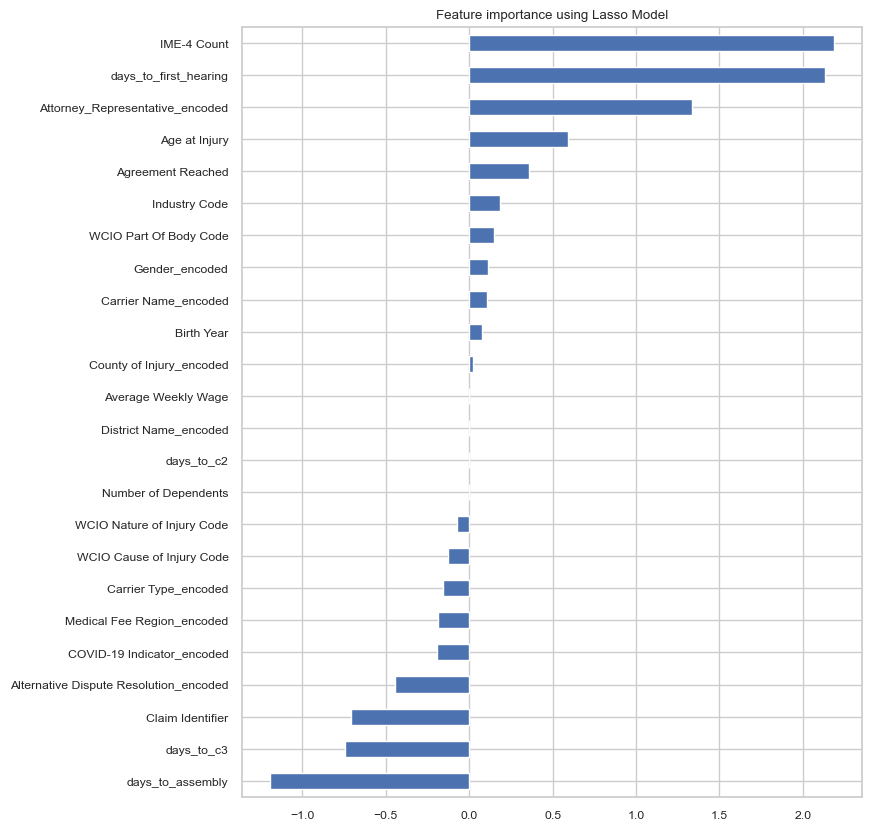

In [68]:
plot_importance(coef_modelLassoRegression,'Lasso')

**4.3.2. Ridge Regression**

In [69]:
modelRidgeRegressionCV = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
modelRidgeRegressionCV.fit(X_train_scaled, y_train)

best_alpha = modelRidgeRegressionCV.alpha_

modelRidgeRegression = Ridge(alpha=best_alpha)

modelRidgeRegression.fit(X_train_scaled, y_train)

Ridge()

In [70]:
coef_modelRidgeRegression = pd.Series(modelRidgeRegression.coef_, index = X_train_scaled.columns)
coef_modelRidgeRegression

Age at Injury                              0.599096
Average Weekly Wage                       15.029779
Birth Year                                 0.077566
Claim Identifier                          -0.744193
IME-4 Count                                3.011109
Industry Code                              0.194111
WCIO Cause of Injury Code                 -0.125187
WCIO Nature of Injury Code                -0.074619
WCIO Part Of Body Code                     0.154987
Agreement Reached                          0.367016
Number of Dependents                       0.001597
days_to_assembly                          -1.779833
days_to_c2                                 0.586382
days_to_c3                                -4.626680
days_to_first_hearing                      4.907081
Alternative Dispute Resolution_encoded    -0.507901
Attorney_Representative_encoded            1.319318
Carrier Name_encoded                       0.109440
Carrier Type_encoded                      -0.165104
County of In

In [71]:
print("Ridge picked " + str(sum(coef_modelRidgeRegression != 0)) + " variables and eliminated the other " +  str(sum(coef_modelRidgeRegression == 0)) + " variables")

Ridge picked 24 variables and eliminated the other 0 variables


In [72]:
coef_modelRidgeRegression.sort_values()

days_to_c3                                -4.626680
days_to_assembly                          -1.779833
Claim Identifier                          -0.744193
Alternative Dispute Resolution_encoded    -0.507901
COVID-19 Indicator_encoded                -0.202169
Medical Fee Region_encoded                -0.185665
Carrier Type_encoded                      -0.165104
WCIO Cause of Injury Code                 -0.125187
WCIO Nature of Injury Code                -0.074619
District Name_encoded                     -0.003477
Number of Dependents                       0.001597
County of Injury_encoded                   0.028942
Birth Year                                 0.077566
Carrier Name_encoded                       0.109440
Gender_encoded                             0.119512
WCIO Part Of Body Code                     0.154987
Industry Code                              0.194111
Agreement Reached                          0.367016
days_to_c2                                 0.586382
Age at Injur

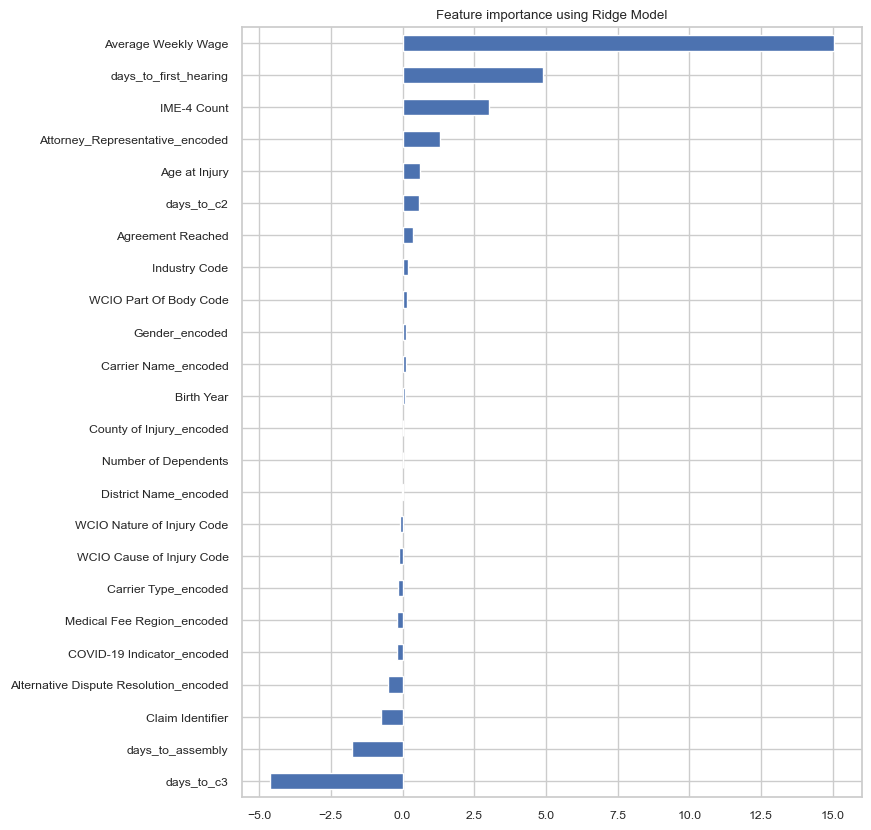

In [73]:
plot_importance(coef_modelRidgeRegression,'Ridge')

**4.3.3. Elastic Net**

In [74]:
modelElasticNetCv = ElasticNetCV(cv=5, random_state=42)
modelElasticNetCv.fit(X_train_scaled, y_train)

best_alpha = modelElasticNetCv.alpha_
best_l1_ratio = modelElasticNetCv.l1_ratio_

modelElasticNet = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)
modelElasticNet.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.000606585604803431, random_state=42)

In [75]:
coef_modelElasticNet = pd.Series(modelElasticNet.coef_, index = X_train_scaled.columns)
coef_modelElasticNet

Age at Injury                             0.590779
Average Weekly Wage                       0.000000
Birth Year                                0.076667
Claim Identifier                         -0.689970
IME-4 Count                               1.181266
Industry Code                             0.178887
WCIO Cause of Injury Code                -0.129693
WCIO Nature of Injury Code               -0.076848
WCIO Part Of Body Code                    0.149292
Agreement Reached                         0.351937
Number of Dependents                      0.000000
days_to_assembly                         -0.750164
days_to_c2                               -0.000000
days_to_c3                               -0.101985
days_to_first_hearing                     0.648118
Alternative Dispute Resolution_encoded   -0.418753
Attorney_Representative_encoded           1.351541
Carrier Name_encoded                      0.106828
Carrier Type_encoded                     -0.161538
County of Injury_encoded       

In [76]:
print("Elastic Net picked " + str(sum(coef_modelElasticNet != 0)) + " variables and eliminated the other " +  str(sum(coef_modelElasticNet == 0)) + " variables")

Elastic Net picked 20 variables and eliminated the other 4 variables


In [77]:
coef_modelElasticNet.sort_values()

days_to_assembly                         -0.750164
Claim Identifier                         -0.689970
Alternative Dispute Resolution_encoded   -0.418753
COVID-19 Indicator_encoded               -0.195271
Medical Fee Region_encoded               -0.184893
Carrier Type_encoded                     -0.161538
WCIO Cause of Injury Code                -0.129693
days_to_c3                               -0.101985
WCIO Nature of Injury Code               -0.076848
Number of Dependents                      0.000000
days_to_c2                               -0.000000
District Name_encoded                    -0.000000
Average Weekly Wage                       0.000000
County of Injury_encoded                  0.019141
Birth Year                                0.076667
Carrier Name_encoded                      0.106828
Gender_encoded                            0.107264
WCIO Part Of Body Code                    0.149292
Industry Code                             0.178887
Agreement Reached              

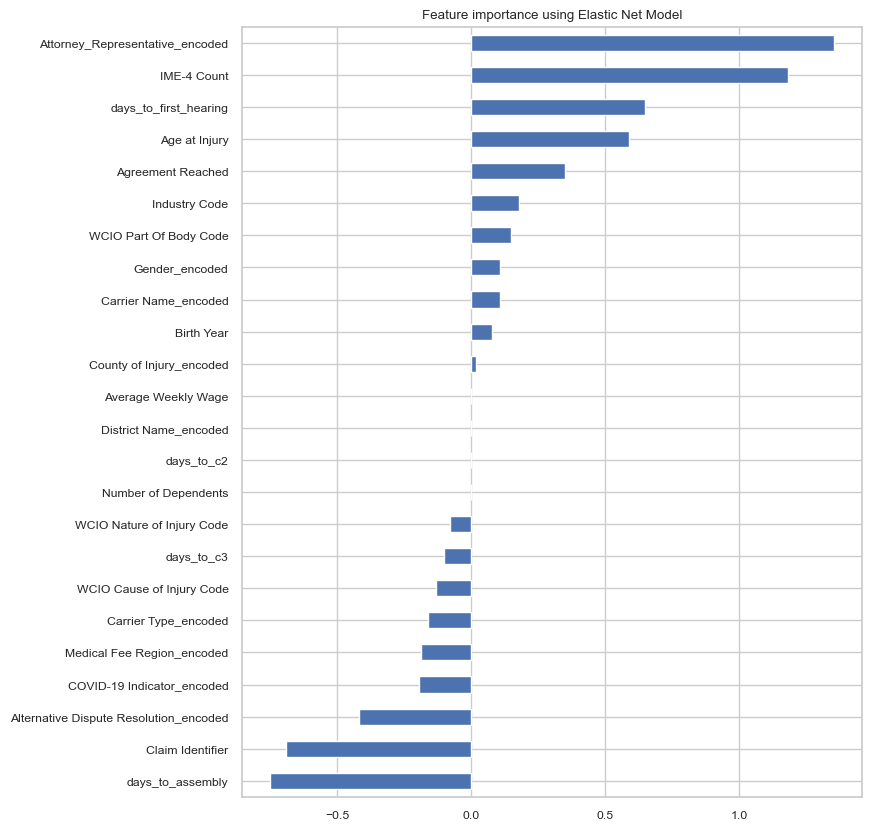

In [78]:
plot_importance(coef_modelElasticNet,'Elastic Net')

### 4.4 Analysing what columns that I go to used in Model Assessment

**Wrapper Methods**

In [79]:
all_features = data_train_label_encoding.columns.to_list()
all_features.pop(19)
data_columns_WM = {'Feature': all_features}

data_columns_WM['RFE(Logistic Regression)'] = ['keep' if feature in features_to_select_LR else 'keep?' for feature in all_features]
data_columns_WM['Decision Tree Classifier'] = ['keep' if feature in features_to_select_TC else 'keep?' for feature in all_features]
data_columns_WM['Decision Tree Regressor'] = ['keep' if feature in features_to_select_TR else 'keep?' for feature in all_features]
data_columns_WM['Random Forest Classifier'] = ['keep' if feature in features_to_select_FC else 'keep?' for feature in all_features]
data_columns_WM['XGBoost'] = ['keep' if feature in features_to_select_XGB else 'keep?' for feature in all_features]
data_columns_WM['LightGBM'] = ['keep' if feature in features_to_select_LGB else 'keep?' for feature in all_features]

df_data_columns_WM = pd.DataFrame(data_columns_WM)
df_data_columns_WM

,Feature,RFE(Logistic Regression),Decision Tree Classifier,Decision Tree Regressor,Random Forest Classifier,XGBoost,LightGBM
0,Age at Injury,keep,keep?,keep?,keep,keep?,keep
1,Average Weekly Wage,keep,keep,keep,keep,keep,keep
2,Birth Year,keep,keep?,keep?,keep,keep?,keep
3,Claim Identifier,keep,keep?,keep?,keep,keep,keep
4,IME-4 Count,keep,keep?,keep?,keep,keep,keep
5,Industry Code,keep,keep?,keep?,keep,keep,keep
6,WCIO Cause of Injury Code,keep,keep?,keep?,keep,keep,keep
7,WCIO Nature of Injury Code,keep,keep?,keep?,keep,keep,keep
8,WCIO Part Of Body Code,keep,keep?,keep?,keep,keep,keep
9,Agreement Reached,keep,keep?,keep?,keep,keep,keep


**Filter Methods**

In [ ]:
def mark_highly_correlated_features(data, isPearson, correlation_threshold=0.8):
    if(isPearson):
        correlation_matrix = data.corr()
    else:
        correlation_matrix = data.corr(method='spearman')

    correlation_decisions = {feature: 'keep' for feature in data.columns}

    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]

            if abs(correlation_value) >= correlation_threshold:
                if correlation_decisions[feature1] == 'keep' and correlation_decisions[feature2] == 'keep':
                    if data[feature1].var() >= data[feature2].var():
                        correlation_decisions[feature2] = 'keep?'
                    else:
                        correlation_decisions[feature1] = 'keep?'

    return correlation_decisions

In [81]:
data_columns_FM = {'Feature': all_features}
features_to_remove = [feature for feature in X_train_scaled.columns if feature not in all_features]
X_train_scaled_filtered = X_train.drop(columns=features_to_remove)

correlation_threshold = 0.8
correlation_decisions_pearson = mark_highly_correlated_features(X_train_scaled_filtered, True, correlation_threshold)
correlation_decisions_spearman = mark_highly_correlated_features(X_train_scaled_filtered, False, correlation_threshold)

data_columns_FM['Univariate'] = ['keep' if float(val) != 0 else 'keep?' for feature, val in X_train_scaled_filtered.var().to_dict().items()]
data_columns_FM['Correlation(Pearson)'] = [correlation_decisions_pearson[feature] for feature in data_columns_FM['Feature']]
data_columns_FM['Correlation(Spearman)'] = [correlation_decisions_spearman[feature] for feature in data_columns_FM['Feature']]
data_columns_FM['Chi-Square'] = ['keep?' if feature in discard_features_chi_square else 'keep' for feature in data_columns_FM['Feature']]


df_data_columns_FM = pd.DataFrame(data_columns_FM)
df_data_columns_FM

,Feature,Univariate,Correlation(Pearson),Correlation(Spearman),Chi-Square
0,Age at Injury,keep,keep,keep?,keep
1,Average Weekly Wage,keep,keep,keep,keep
2,Birth Year,keep,keep,keep,keep
3,Claim Identifier,keep,keep,keep,keep
4,IME-4 Count,keep,keep,keep,keep
5,Industry Code,keep,keep,keep,keep
6,WCIO Cause of Injury Code,keep,keep,keep,keep
7,WCIO Nature of Injury Code,keep,keep,keep,keep
8,WCIO Part Of Body Code,keep,keep,keep,keep
9,Agreement Reached,keep,keep,keep,keep?


**Embedded Methods**

In [82]:
data_columns_EM = {'Feature' : X_train_scaled.columns}

df_lasso = pd.DataFrame({'Feature': X_train_scaled.columns, 'Lasso Coefficient': coef_modelLassoRegression})
df_RidgeRegression = pd.DataFrame({'Feature': X_train_scaled.columns, 'Ridge Coefficient': coef_modelRidgeRegression})
df_elasticnet = pd.DataFrame({'Feature': X_train_scaled.columns, 'ElasticNet Coefficient': coef_modelElasticNet})

threshold = 0.05

data_columns_EM['Lasso Coefficient'] = df_lasso['Lasso Coefficient'].apply(lambda x: 'keep' if x != 0 else 'keep?')
data_columns_EM['Ridge Coefficient'] = df_RidgeRegression['Ridge Coefficient'].apply(lambda x: 'keep' if abs(x) > threshold else 'keep?')
data_columns_EM['ElasticNet Coefficient'] = df_elasticnet['ElasticNet Coefficient'].apply(lambda x: 'keep' if abs(x) > threshold else 'keep?')

df_data_columns_EM = pd.DataFrame(data_columns_EM)
df_data_columns_EM.reset_index(drop=True, inplace=True)
df_data_columns_EM


,Feature,Lasso Coefficient,Ridge Coefficient,ElasticNet Coefficient
0,Age at Injury,keep,keep,keep
1,Average Weekly Wage,keep?,keep,keep?
2,Birth Year,keep,keep,keep
3,Claim Identifier,keep,keep,keep
4,IME-4 Count,keep,keep,keep
5,Industry Code,keep,keep,keep
6,WCIO Cause of Injury Code,keep,keep,keep
7,WCIO Nature of Injury Code,keep,keep,keep
8,WCIO Part Of Body Code,keep,keep,keep
9,Agreement Reached,keep,keep,keep


**Final Decision**

In [83]:
def decision_based_on_models(row):
    keep_count = sum([1 if 'keep' == value else 0 for value in row])
    return 'keep' if keep_count >= 3 else 'drop'

In [84]:
df_final_decision = pd.DataFrame({'Feature': all_features})

df_final_decision['Filter Methods Decision'] = df_data_columns_FM.iloc[:, 1:].apply(decision_based_on_models, axis=1)
df_final_decision['Wrapper Methods Decision'] = df_data_columns_WM.iloc[:, 1:].apply(decision_based_on_models, axis=1)
df_final_decision['Embedded Methods Decision'] = df_data_columns_EM.iloc[:, 1:].apply(decision_based_on_models, axis=1)


df_final_decision

,Feature,Filter Methods Decision,Wrapper Methods Decision,Embedded Methods Decision
0,Age at Injury,keep,keep,keep
1,Average Weekly Wage,keep,keep,drop
2,Birth Year,keep,keep,keep
3,Claim Identifier,keep,keep,keep
4,IME-4 Count,keep,keep,keep
5,Industry Code,keep,keep,keep
6,WCIO Cause of Injury Code,keep,keep,keep
7,WCIO Nature of Injury Code,keep,keep,keep
8,WCIO Part Of Body Code,keep,keep,keep
9,Agreement Reached,keep,keep,keep


- Final Decision about what variables are you gonna keep:

In [85]:
def select_features(df):
    selected_features = []
    dropped_features = []

    for index, row in df.iterrows():
        decisions = [row['Filter Methods Decision'], row['Wrapper Methods Decision'], row['Embedded Methods Decision']]
        keep_count = decisions.count('keep')

        if keep_count >= 2:
            selected_features.append(row['Feature'])
        else:
            dropped_features.append(row['Feature'])

    return selected_features, dropped_features

In [86]:
final_features, dropped_features = select_features(df_final_decision)
print("Features selecionadas:", final_features)
print("Features descartadas:", dropped_features)

Features selecionadas: ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'Claim Identifier', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents', 'days_to_assembly', 'days_to_c3', 'days_to_first_hearing', 'Alternative Dispute Resolution_encoded', 'Attorney_Representative_encoded', 'Carrier Name_encoded', 'Carrier Type_encoded', 'County of Injury_encoded', 'COVID-19 Indicator_encoded', 'District Name_encoded', 'Gender_encoded', 'Medical Fee Region_encoded']
Features descartadas: ['days_to_c2', 'WCB Decision_encoded']


### DataSet For Model Assessment

In [87]:
data_train_label_encoding = data_train_label_encoding.drop(columns=dropped_features)
data_train_label_encoding

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents,days_to_assembly,days_to_c3,days_to_first_hearing,Alternative Dispute Resolution_encoded,Attorney_Representative_encoded,Carrier Name_encoded,Carrier Type_encoded,Claim Injury Type_encoded,County of Injury_encoded,COVID-19 Indicator_encoded,District Name_encoded,Gender_encoded,Medical Fee Region_encoded
0,31.0,0.00,1988.0,5393875,2.0,44.0,27.0,10.0,62.0,0.0,1.0,2.0,27.0,237.0,0,0,1197,0,1,49,0,7,1,0
1,46.0,1745.93,1973.0,5393091,4.0,23.0,97.0,49.0,38.0,1.0,4.0,124.0,137.0,175.0,0,1,2044,0,3,61,0,5,0,0
2,40.0,1434.80,1979.0,5393889,2.0,56.0,79.0,7.0,10.0,0.0,6.0,26.0,27.0,237.0,0,0,894,0,3,35,0,0,1,1
3,42.0,0.00,1977.0,957648180,2.0,61.0,56.0,49.0,38.0,0.0,3.0,10.0,27.0,237.0,0,0,1710,0,1,51,0,4,1,3
4,61.0,0.00,1958.0,5393887,2.0,62.0,16.0,43.0,36.0,0.0,1.0,2.0,27.0,237.0,0,0,1710,1,1,13,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,42.0,0.00,1977.0,327160035,2.0,61.0,56.0,49.0,38.0,0.0,3.0,10.0,27.0,237.0,0,0,1710,0,1,51,0,4,1,3
593467,72.0,0.00,1950.0,6165075,2.0,48.0,25.0,90.0,-9.0,0.0,3.0,18.0,27.0,237.0,0,0,1747,0,1,52,0,1,0,0
593468,42.0,0.00,1977.0,249875936,2.0,61.0,56.0,49.0,38.0,0.0,3.0,10.0,27.0,237.0,0,0,1710,0,1,51,0,4,1,3
593469,42.0,0.00,1977.0,120584215,2.0,61.0,56.0,49.0,38.0,0.0,3.0,10.0,27.0,237.0,0,0,1710,0,1,51,0,4,1,3


## 5. Model Optimization

In [88]:
excel_file = 'Codification_for_categorical_variables_3.xlsx'
sheet_names = pd.ExcelFile(excel_file).sheet_names

In [89]:
column_to_sheet_mapping = {column: column for column in data_test_label_encoding.columns if column in sheet_names}
print(column_to_sheet_mapping)

{'Attorney_Representative': 'Attorney_Representative', 'Carrier Name': 'Carrier Name', 'Carrier Type': 'Carrier Type', 'County of Injury': 'County of Injury', 'COVID-19 Indicator': 'COVID-19 Indicator', 'District Name': 'District Name', 'Gender': 'Gender', 'Medical Fee Region': 'Medical Fee Region'}


In [90]:
for column, sheet_name in column_to_sheet_mapping.items():
    codificacao_df = pd.read_excel(excel_file, sheet_name=sheet_name)

    mapping_dict = dict(zip(codificacao_df[column], codificacao_df[column + '_encoded']))

    if column in data_test_label_encoding.columns:
        data_test_label_encoding[column] = data_test_label_encoding[column].map(mapping_dict)


In [91]:
X_Mo = data_train_label_encoding.drop(['Claim Identifier', 'Claim Injury Type_encoded'], axis=1)
y_Mo = data_train_label_encoding['Claim Injury Type_encoded']

In [92]:
X_Mo, data_test_label_encoding = X.align(data_test_label_encoding, join='outer', axis=1, fill_value=0)

In [93]:
X_train_FC, X_val_FC, y_train_FC, y_val_FC = train_test_split(X_Mo, y_Mo, test_size=0.2, random_state=42)

**XGBC Classifier(0.32053)**

In [94]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train_FC, y_train_FC)

model_XGBC = XGBClassifier(
    n_estimators=100,
    learning_rate=0.15,
    max_depth=9,
    objective='multi:softmax',
    eval_metric='mlogloss',
    booster='gbtree',
    max_delta_step=10,
    tree_method='hist',
    sampling_method='uniform',
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5,
    random_state=42,
    n_jobs=-1
)

In [95]:
model_XGBC.fit(X_resampled, y_resampled, verbose=True)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=10, max_depth=9,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, objective='multi:softmax', ...)

In [96]:
y_val_pred_XGBC = model_XGBC.predict(X_val_FC)
f1 = f1_score(y_val_FC, y_val_pred_XGBC, average='macro')

print(classification_report(y_val_FC, y_val_pred_XGBC))
print(f'Validation Accuracy: {accuracy_score(y_val_FC, y_val_pred_XGBC)}')
print("Macro F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.61      0.53      0.57      2463
           1       0.87      0.97      0.92     62313
           2       0.49      0.12      0.19     13677
           3       0.79      0.85      0.81     29567
           4       0.65      0.68      0.66      9716
           5       0.16      0.19      0.17       847
           6       0.00      0.00      0.00        21
           7       0.25      0.62      0.36        91

    accuracy                           0.80    118695
   macro avg       0.48      0.49      0.46    118695
weighted avg       0.77      0.80      0.77    118695

Validation Accuracy: 0.8044399511352627
Macro F1 Score: 0.46127869348722106


In [97]:
y_test_pred_XGBC = model_XGBC.predict(data_test_label_encoding)

mapa_codificacao = {
    0: '1. CANCELLED',
    1: '2. NON-COMP',
    2: '3. MED ONLY',
    3: '4. TEMPORARY',
    4: '5. PPD SCH LOSS',
    5: '6. PPD NSL',
    6: '7. PTD',
    7: '8. DEATH'
}

y_pred_codificado_XGBC = [mapa_codificacao[pred] for pred in y_test_pred_XGBC]

data_test_label_encoding['Claim Injury Type'] = y_pred_codificado_XGBC

submission_df = data_test_label_encoding[['Claim Identifier', 'Claim Injury Type']]
submission_df.to_csv('submission_group_40.csv', index=False)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Alternative Dispute Resolution: object, Industry Code Description: object, WCIO Cause of Injury Description: object, WCIO Nature of Injury Description: object, WCIO Part Of Body Description: object

In [ ]:
##Testes
data_test_label_encoding = data_test_label_encoding.drop(columns=['Claim Injury Type'])

KeyError: "['Claim Injury Type'] not found in axis"